##**Data Science & Business Analytics Internship** 

##**TASK 1 - Prediction using Supervised Machine Learning**
##*In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.* 

##**Import main libraries**

In [ ]:
import numpy as np
# Powerful n-dimensional arrays. Numerical computing tools. Interoperable:
import pandas as pd
# python powerfull library used for data manipulating and data analysis:
import matplotlib.pyplot as plt
# mayplotlib is a ploting library we can use this to make awesome graphs:
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the inline:
import seaborn as sns
# seaborn also a ploting library we can use this to make awesome graphs:
from sklearn.metrics import mean_squared_error

In [ ]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

##**Load data and Explore data**


In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
study_data = pd.read_csv(url)
study_data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
study_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


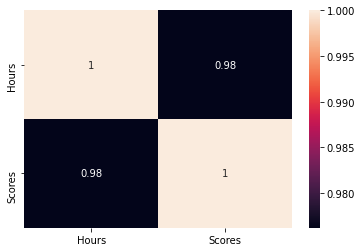

In [ ]:
study_data.corr()
sns.heatmap(study_data.corr(),annot=True)

From above correlation of the value, we can say scores are highly dependent on hours of study 

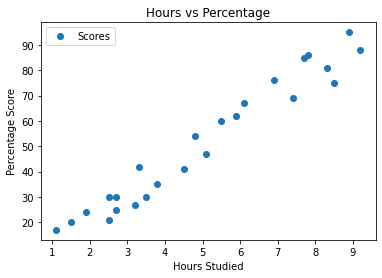

In [ ]:
# Plotting the distribution of scores
study_data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the hours of study and percentange of score. As the hours of study is more the percentage of marks is increasing.

##**Preparing the data**

In [ ]:
x = study_data.iloc[:,0].values
y = study_data.iloc[:,1].values
print(x)
print(y)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
#reshapeing the data
array = x.reshape(-1,1)
print (array)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
#spliting the data
x_train, x_test, y_train, y_test = train_test_split(array,y,test_size=0.2,random_state=5)
lm = LinearRegression()
lm.fit(x_train,y_train)
print('training complet')
print(lm.coef_)
print(lm.intercept_)

training complet
[9.60498629]
3.0980408893375326


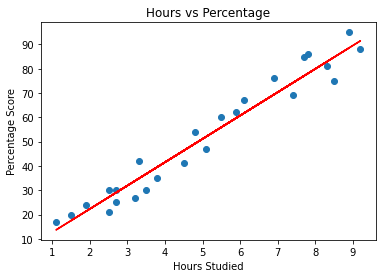

In [ ]:
# Plotting the regression line
line = lm.coef_*array+lm.intercept_

# Plotting for the test data
plt.scatter(array, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.plot(array, line ,color='red');
plt.show()

In [ ]:
# Predicting the scores
y_pred = lm.predict(x_test) 

In [ ]:
# Comparing Actual vs Predicted
study_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
study_data

,Actual,Predicted
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


In [ ]:
# You can also test with your own data
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.94416404722054


The predicted score if a person studies for 9.25 hours is 93.69173248737538
Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173248737538

In [ ]:
#In the last step, we are going to evaluate our trained model by calculating mean absolute error
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

mse = 37.563452579516046
r2 = 0.9000546706590143
